## Project Goal:
The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.

In [7]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Load Data

The dataset, sourced online, includes user-level information such as age, total orders, average spending, and preferred cuisine. This data is loaded into a DataFrame and serves as the foundation for all subsequent processing and analysis.

# Exploring and Analyzing Dataset

In [10]:
# import dataset using read_csv method 
df=pd.read_csv('food_delivery (1).csv')
df.head()

UserID  Age  TotalOrders  AverageSpend FavoriteCuisine  DeliveryRating  \
0       1   56           37        312.70         Mexican             4.6   
1       2   46           34        193.97         Mexican             3.0   
2       3   32           22        291.66         Mexican             4.1   
3       4   25           30        232.21            Thai             3.7   
4       5   38           27        244.84         Italian             4.7   

   AppUsageTimePerDay  
0                20.9  
1               150.2  
2                59.7  
3                85.5  
4                13.7

## Summary Statistics

An initial exploration is carried out to get a clear understanding of the dataset’s structure:

- The number of rows and columns is determined.
- Column names are listed.
- Data types, memory usage, and count of non-null values for each column are examined.
- Descriptive statistics such as mean, median, minimum, and maximum are reviewed for numerical features.

This early analysis offers valuable insights into the data and helps identify any preprocessing steps that may be required.

In [7]:
# check the data types of each column and non-null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [9]:
# check the null value in this 
df.isnull().sum()

UserID                0
Age                   0
TotalOrders           0
AverageSpend          0
FavoriteCuisine       0
DeliveryRating        0
AppUsageTimePerDay    0
dtype: int64

In [11]:
# shape of the data set 
df.shape

(500, 7)

In [13]:
# summary statistics 
df.describe()

UserID         Age  TotalOrders  AverageSpend  DeliveryRating  \
count  500.000000  500.000000   500.000000    500.000000      500.000000   
mean   250.500000   39.326000    29.714000    306.584680        3.759400   
std    144.481833   12.200386     5.747196     74.732407        0.731794   
min      1.000000   18.000000    14.000000     80.900000        2.500000   
25%    125.750000   29.000000    25.000000    256.685000        3.100000   
50%    250.500000   41.000000    30.000000    305.170000        3.800000   
75%    375.250000   50.000000    33.000000    355.870000        4.400000   
max    500.000000   59.000000    47.000000    539.480000        5.000000   

       AppUsageTimePerDay  
count          500.000000  
mean            93.515400  
std             48.472478  
min             10.100000  
25%             49.325000  
50%             93.100000  
75%            137.275000  
max            179.900000

# EDA

In [15]:
n_features = 6
n_cols = 2 
n_rows = (n_features + n_cols - 1) 

features=df.drop(columns=['UserID']).columns

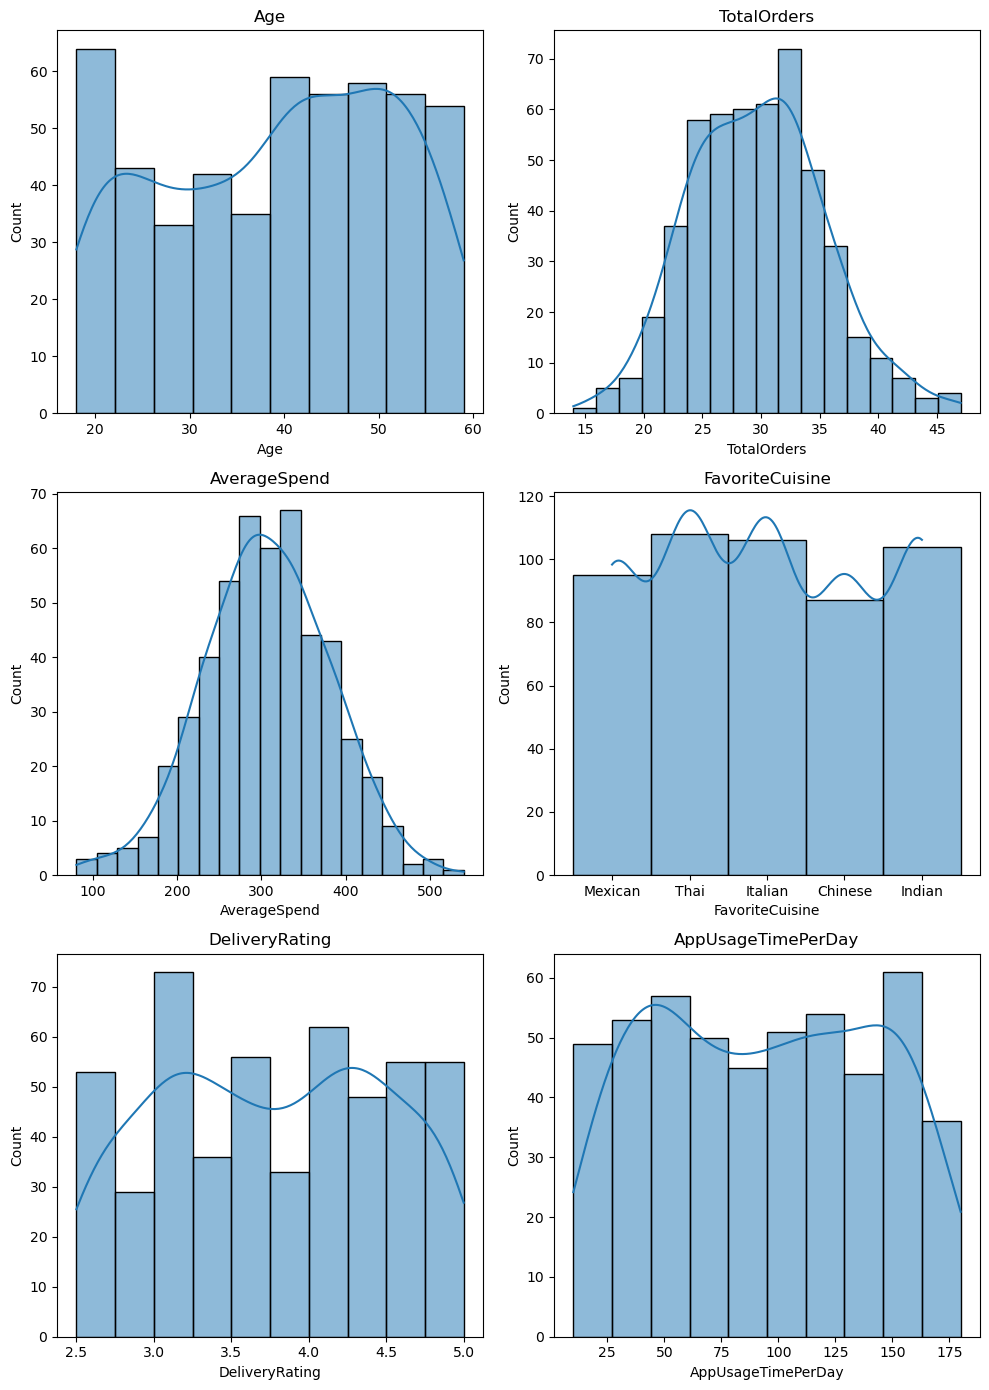

In [17]:
# Create subplots
fig, axes = plt.subplots(3, n_cols, figsize=(10,2*n_rows))

#create histograms for all features 

for idx, feature in enumerate(features):
    row = idx // n_cols
    col = idx % n_cols
    sns.histplot(data=df, x=feature, ax=axes[row][col], kde=True)
    axes[row][col].set_title(feature)

plt.tight_layout()
plt.show()

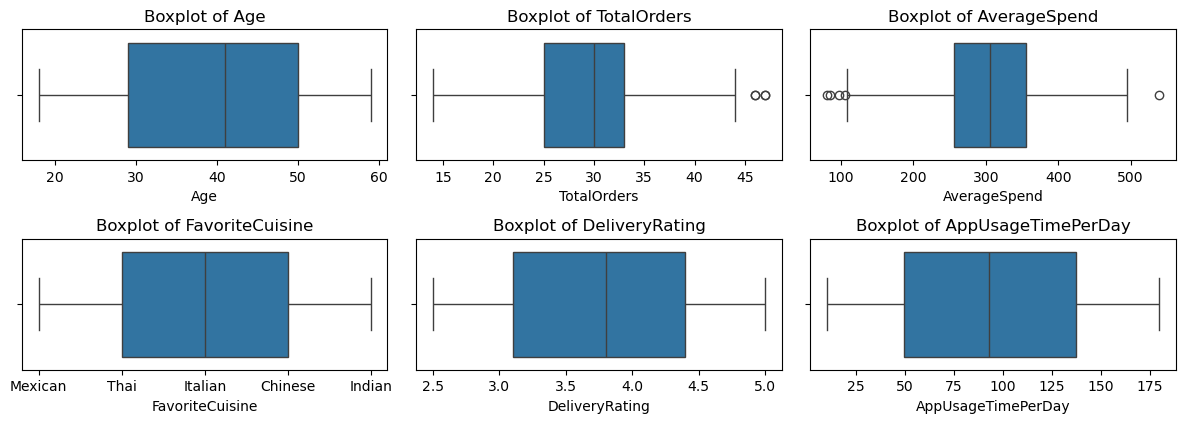

In [19]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

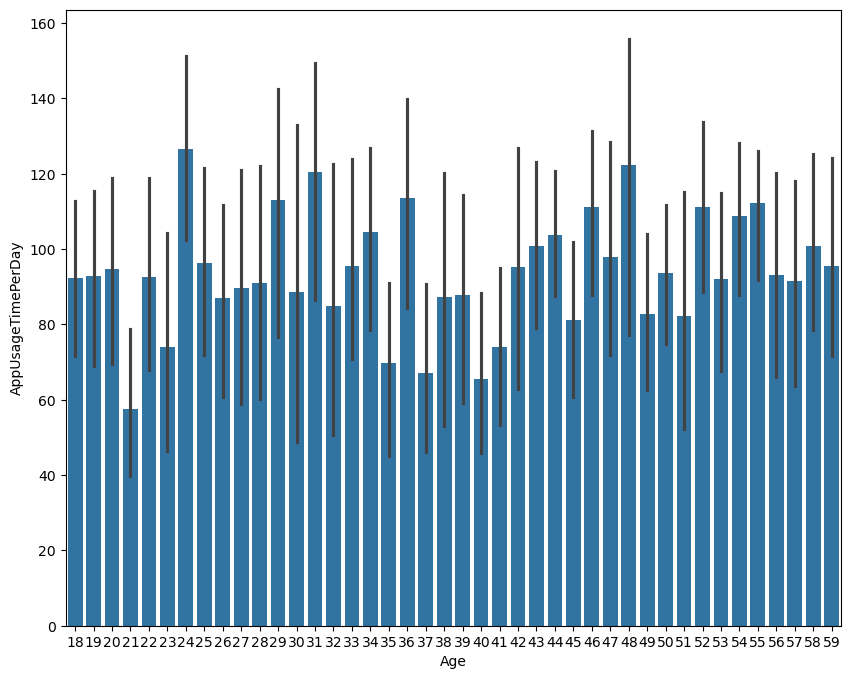

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Age'], y=df['AppUsageTimePerDay'])
plt.show()

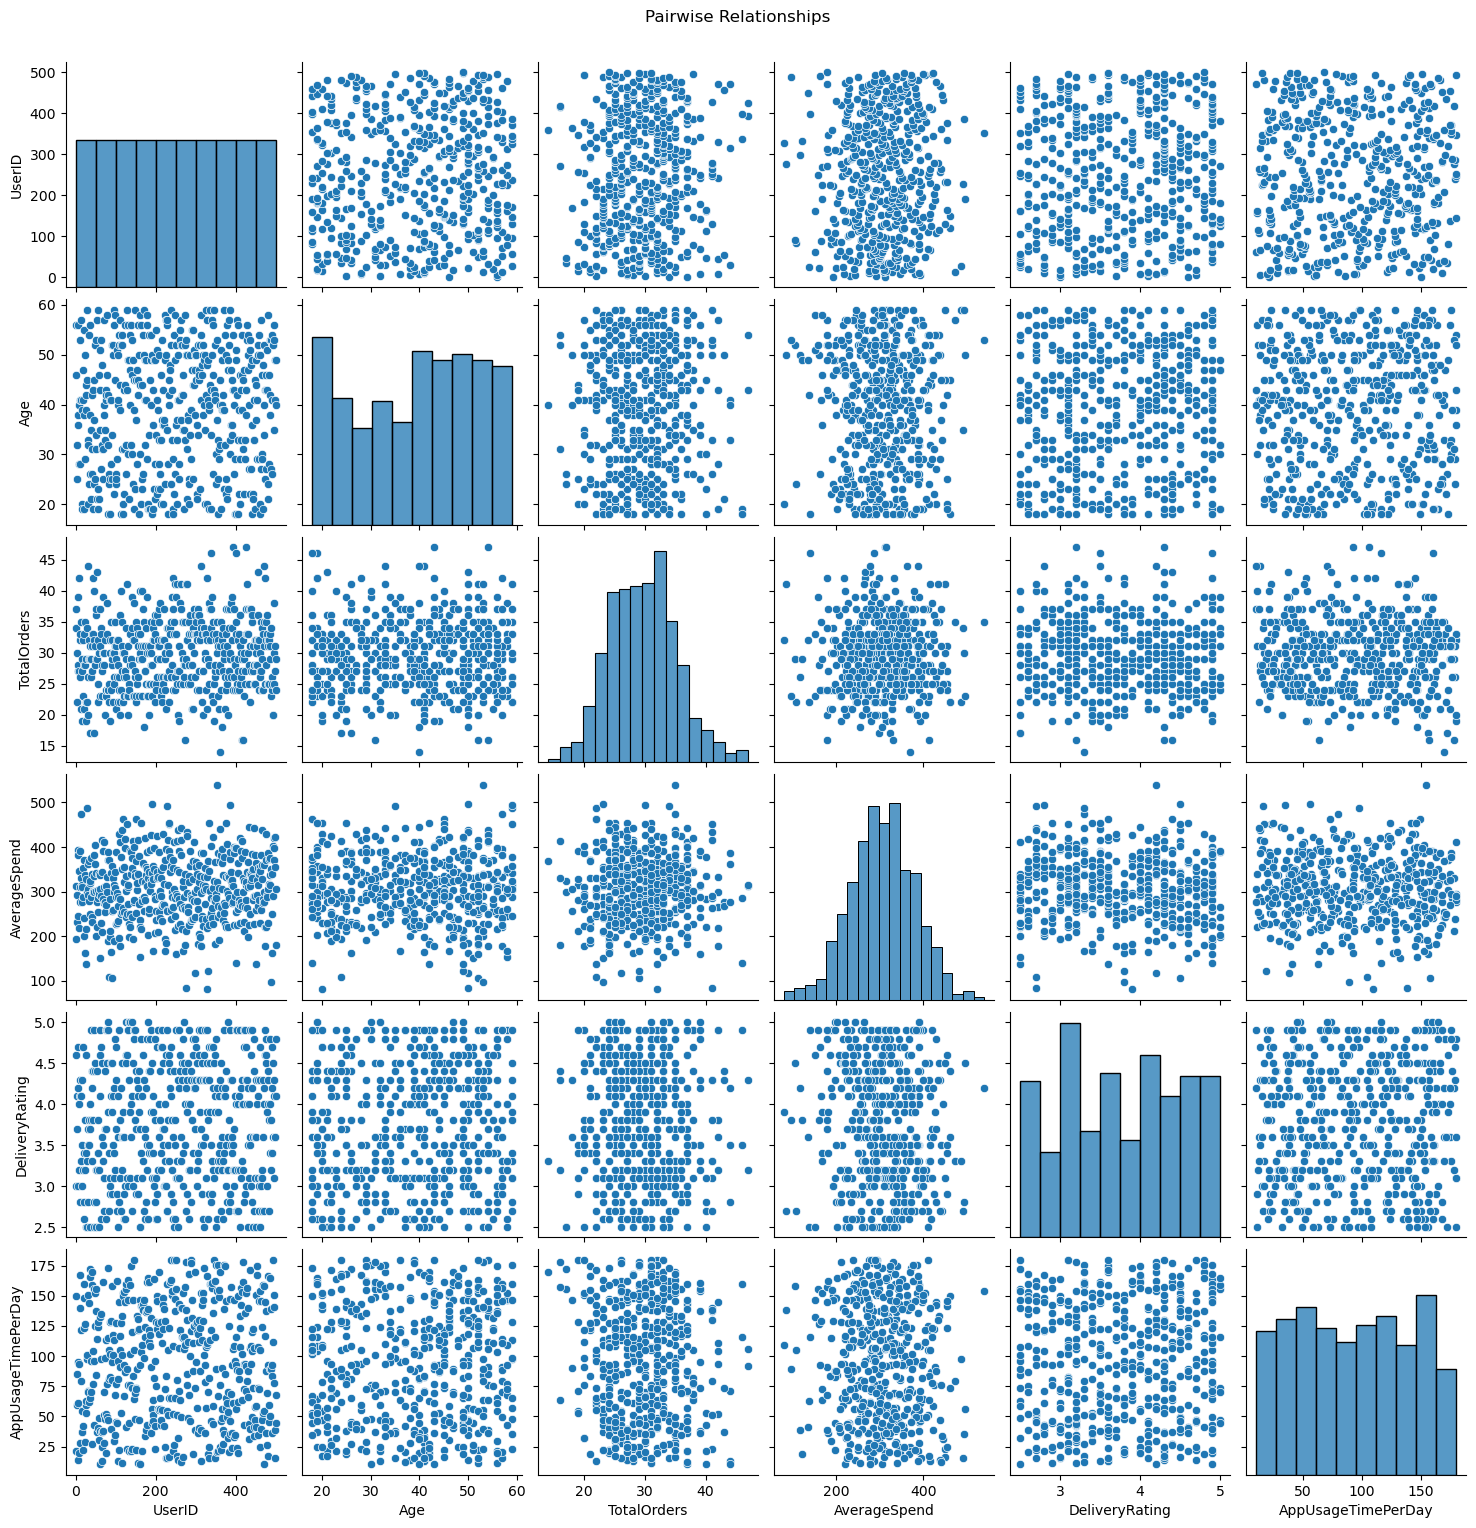

In [23]:
sns.pairplot(df)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

<Axes: >

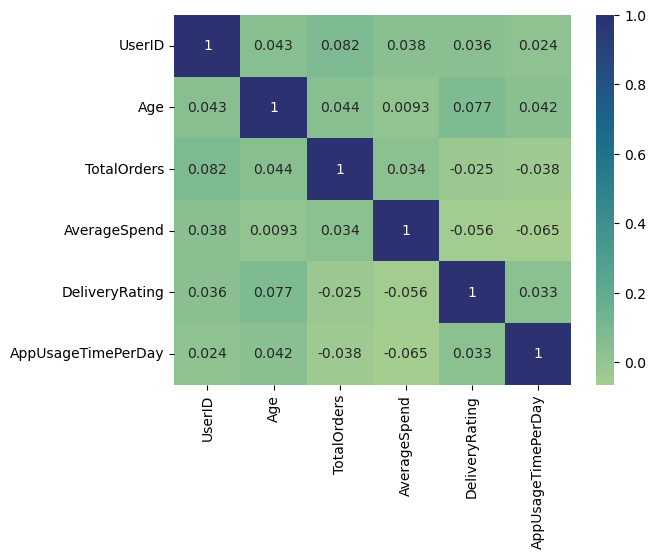

In [22]:
# check the Relationship between all columns using correlation matrix and heatmap 

numeric_features=df.select_dtypes(include='number')
corr=numeric_features.corr()
sns.heatmap(corr, annot=True, cmap='crest')

## Here we observe that some of the string relationships among the columns :

- TotalOrder , UserId
- Age, DeliveryRating 
- Age, Appusagetimeperday

In [24]:
# Encoding the nominal categorical variable FavoriteCuisine using LabelEncoder()
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['FavoriteCuisine']=le.fit_transform(df['FavoriteCuisine'])
df.head()

UserID  Age  TotalOrders  AverageSpend  FavoriteCuisine  DeliveryRating  \
0       1   56           37        312.70                3             4.6   
1       2   46           34        193.97                3             3.0   
2       3   32           22        291.66                3             4.1   
3       4   25           30        232.21                4             3.7   
4       5   38           27        244.84                2             4.7   

   AppUsageTimePerDay  
0                20.9  
1               150.2  
2                59.7  
3                85.5  
4                13.7

In [26]:
# drop unused or unnecessary column user Id
df.drop(columns=['UserID'], inplace=True)

Before our data is given to model it is require to Scale it for out model Kmeans()

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sd=StandardScaler()
X_sc=sd.fit_transform(df)
X_sc

array([[ 1.36804678,  1.26901826,  0.08191151,  0.66822722,  1.14983409,
        -1.49957516],
       [ 0.54757972,  0.74650182, -1.50841474,  0.66822722, -1.03876279,
         1.17058941],
       [-0.60107417, -1.34356394, -0.19990828,  0.66822722,  0.46589756,
        -0.69831928],
       ...,
       [ 0.13734619,  0.22398538,  0.65733825,  1.38367392, -0.21803896,
        -1.61728544],
       [ 0.05529948, -0.12435891, -0.0123856 ,  1.38367392,  0.46589756,
        -1.00601806],
       [ 0.79371984, -0.99521964, -1.69754476,  0.66822722,  1.4234087 ,
        -0.5289817 ]])

## Dimensionality Reduction with PCA

Principal Component Analysis (PCA) is used to reduce the dataset to two dimensions, allowing for effective visualization of high-dimensional data in a 2D space. In addition to aiding visualization, PCA helps eliminate redundancy by combining correlated features into principal components, simplifying the dataset without significant loss of information.


In [30]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_sc)

In [32]:
X_pca.shape

(500, 2)

## User Grouping with KMeans Clustering

KMeans, an unsupervised machine learning algorithm, is used to group similar users into clusters. In this step, the standardized data is segmented into three distinct clusters. Each user is assigned a cluster label, indicating the group they most closely align with based on their behavior and preferences.


In [34]:
from sklearn.cluster import KMeans

# Apply KMeans to PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [36]:
kmeans.cluster_centers_

array([[ 1.05190183,  0.60881857],
       [-0.96551878,  0.46803631],
       [ 0.11405017, -1.07909264]])

## Cluster Visualization with 2D plot

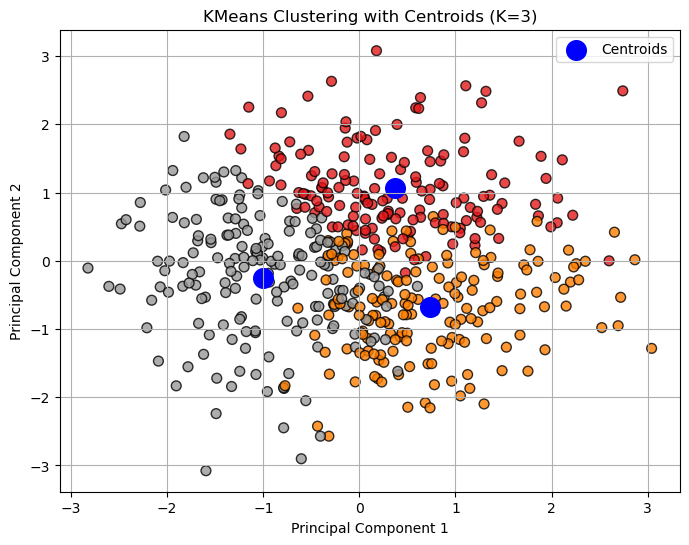

In [48]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=50, alpha=0.8, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='o', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with Centroids (K=3)')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation
The scatter plot shows users in a 2D space after applying PCA, with each point representing a user and the colors indicating their KMeans cluster. PCA was used to reduce the complexity of the data by combining multiple features into two main components (`PC1` and `PC2`), while still preserving most of the important information. The blue markers highlight the cluster centers, projected into this reduced space using `pca.transform()`.

Overall, the clusters are fairly well-separated, which suggests that features like `AverageSpend` and `AppUsageTimePerDay` play a strong role in distinguishing user behavior. Cluster 1 is more compact, meaning the users in this group are quite similar to each other. In contrast, Cluster 2 is more spread out, indicating a wider variety of user patterns. The red centroids align nice


In [40]:
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_sc)

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_3d)

## Cluster Visualization with 3D plot

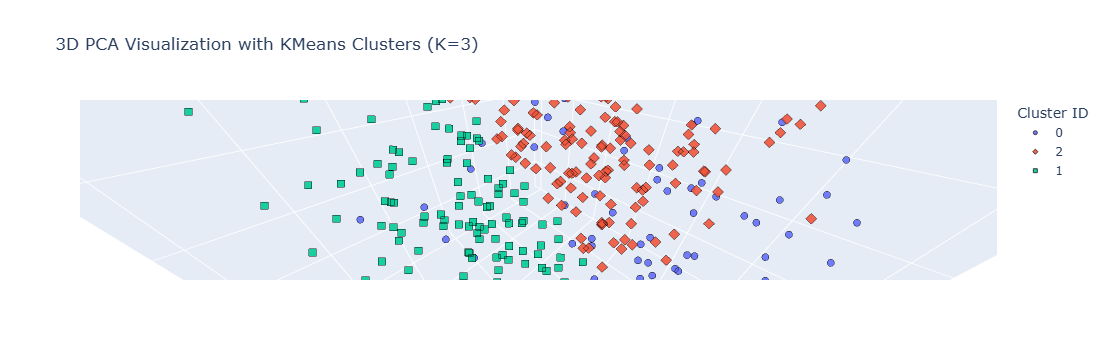

In [44]:
import plotly.express as px

# 3. Create a DataFrame for Plotly
df_plot = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = clusters.astype(str)  # convert to string for coloring

# 4. Plotly 3D Scatter Plot
fig = px.scatter_3d(
    df_plot, x='PC1', y='PC2', z='PC3',
    color='Cluster',
    title='3D PCA Visualization with KMeans Clusters (K=3)',
    opacity=0.9,
    symbol='Cluster'
)

fig.update_traces(marker=dict(size=4, line=dict(width=0.8, color='black')))
fig.update_layout(legend_title_text='Cluster ID')
fig.show()

## Final Findings

- **Clean and Ready Data**: The dataset was in good shape with no major missing values. Unnecessary columns were removed, and categorical data was properly encoded for analysis.

- **Balanced Features**: All numerical values were standardized so that no single feature could dominate the clustering. PCA was used to reduce the data to two dimensions, making it easier to visualize and interpret.

- **Clustering Insights**:
  - **KMeans** grouped users into three clear segments based on their spending habits, order frequency, and preferences.

- **Clear Visual Patterns**: The scatter plots based on PCA components showed that users were grouped distinctly, making it easier to understand their behavior and tailor marketing or product strategies accordingly.